In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../Datasets/new_data.csv")
# test = pd.read_csv('Datasets/test.csv')
# validation = pd.read_csv('Datasets/validation.csv')

In [3]:
train.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

In [4]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24038 entries, 0 to 24037
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24038 non-null  object
 1   label   24038 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 375.7+ KB


In [6]:
train['label'].value_counts()

label
4    6500
1    6467
0    5882
3    5189
Name: count, dtype: int64

## Visualisation

<Axes: xlabel='label', ylabel='count'>

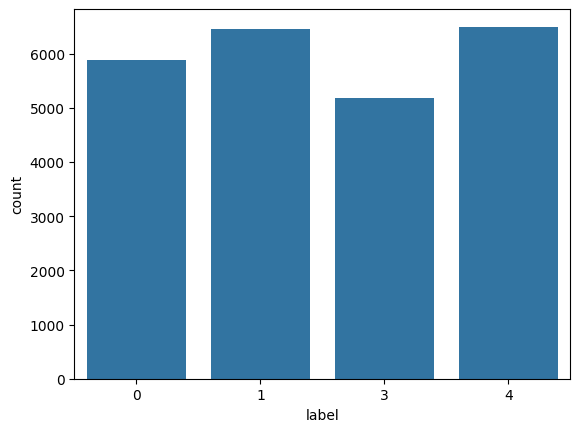

In [7]:
sns.countplot(x='label',data=train)

In [8]:
train['text']=train['text'].astype(str)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24038 entries, 0 to 24037
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24038 non-null  object
 1   label   24038 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 375.7+ KB


## Data Preprocessing

In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\perri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
print(list(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
stop_neg = ['until', 'against', 'no', 'nor', 'not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [13]:
stop_list = [i for i in list(stopwords.words('english')) if i not in stop_neg]

In [2]:
def preprocess_text(text):
    text = text.lower()
    # Nettoyage du train set
    text = re.sub(r'https\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    tokens = word_tokenize(text) # tokenisation
    tokens = [token for token in tokens if token not in ['feel', 'feeling']]
    filtered_tokens = [token for token in tokens if token not in stop_list]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [str(lemmatizer.lemmatize(token)) for token in filtered_tokens]
    # lemmatized_tokens = [str(lemmatizer.lemmatize(token)) for token in tokens]
    return lemmatized_tokens

In [15]:
train['text'] = train['text'].apply(preprocess_text)

In [16]:
print(train.text.iloc[0])

['didnt', 'humiliated']


In [17]:
train.head()

,text,label
0,"[didnt, humiliated]",0
1,"[go, hopeless, damned, hopeful, around, someon...",0
2,"[im, grabbing, minute, post, greedy, wrong]",3
3,"[ever, nostalgic, fireplace, know, still, prop...",1
4,[grouchy],3


In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train, test_size=0.3, random_state=42)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16826 entries, 12513 to 23654
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16826 non-null  object
 1   label   16826 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 394.4+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7212 entries, 2797 to 2540
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7212 non-null   object
 1   label   7212 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 169.0+ KB


In [21]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=train['text'], min_count=25, vector_size=600, window=8, workers=10, epochs=100)
model.train(train['text'], total_examples=len(train['text']), epochs=100)


print(model.wv.most_similar('hate'))


def vectorize_text(text, model):
    word_vectors = [model.wv[word] for word in text if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)
    
train_vectors = train['text'].apply(lambda x: vectorize_text(x, model))
test_vectors = test['text'].apply(lambda x: vectorize_text(x, model))
# validation_vectors = validation['text'].apply(lambda x: vectorize_text(x, model))

X_train = np.vstack(train_vectors)
X_test = np.vstack(test_vectors)
# X_validation = np.vstack(validation_vectors)

y_train = train['label']
y_test = test['label']
# y_validation = validation['label']

[('inadequate', 0.22271504998207092), ('everything', 0.16949787735939026), ('valued', 0.15964101254940033), ('attention', 0.15668714046478271), ('unimportant', 0.15634649991989136), ('hateful', 0.15409348905086517), ('awkward', 0.14752276241779327), ('shitty', 0.14575447142124176), ('greedy', 0.1455041766166687), ('didnt', 0.14374329149723053)]


In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Replace LogisticRegression with SGDClassifier for online learning
rf_logistic = SGDClassifier(loss='hinge', random_state=42, max_iter=1000, tol=1e-3)
rf_logistic.fit(X_train, y_train)

y_pred_lg = rf_logistic.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lg)}')
print(classification_report(y_test, y_pred_lg))
print(confusion_matrix(y_test, y_pred_lg))


Logistic Regression Accuracy: 0.7440377149195785
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1745
           1       0.73      0.80      0.76      1911
           3       0.75      0.74      0.75      1566
           4       0.79      0.74      0.76      1990

    accuracy                           0.74      7212
   macro avg       0.74      0.74      0.74      7212
weighted avg       0.75      0.74      0.74      7212

[[1216  223  165  141]
 [ 175 1528   83  125]
 [ 167  129 1158  112]
 [ 194  204  128 1464]]


In [23]:
from sklearn.svm import SVC

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_svc = svc_classifier.predict(X_test)  
print(f'SVC Accuracy: {accuracy_score(y_test, y_pred_svc)}')
print(classification_report(y_test, y_pred_svc))


SVC Accuracy: 0.8065723793677204
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1745
           1       0.76      0.87      0.81      1911
           3       0.88      0.79      0.83      1566
           4       0.87      0.79      0.83      1990

    accuracy                           0.81      7212
   macro avg       0.81      0.81      0.81      7212
weighted avg       0.81      0.81      0.81      7212



In [24]:
print(confusion_matrix(y_test, y_pred_svc))

[[1338  212   80  115]
 [ 148 1667   36   60]
 [ 129  131 1235   71]
 [ 175  188   50 1577]]


In [25]:
# Updating the predict_sentiment function to ask for feedback and learn from it
def predict_and_learn(model, vectorizer_model):
    # Step 1: Get a sentence from the user
    new_sentence = input("Enter a sentence: ")

    # Step 2: Preprocess and vectorize the sentence
    preprocessed_sentence = preprocess_text(new_sentence)
    sentence_vector = vectorize_text(preprocessed_sentence, vectorizer_model)

    # Step 3: Make a prediction using the trained model
    predicted_label = model.predict([sentence_vector])[0]
    print(f"Predicted label: {predicted_label}")

    # Step 4: Ask the user if the prediction was correct
    feedback = input("Was the prediction correct? (yes/no): ").lower()

    if feedback == 'yes':
        print("Great! The model has noted that the prediction was correct.")
    elif feedback == 'no':
        # Step 5: If incorrect, ask for the correct label
        correct_label = input(f"What should the correct label be? Choose from: {train['label'].unique()}: ")

        # Step 6: Convert the corrected label to a format that can be used for training
        correct_label = int(correct_label)  # Assuming your labels are encoded as integers

        # Step 7: Update the model using partial_fit
        model.partial_fit([sentence_vector], [correct_label], classes=np.unique(y_train))

        print(f"The model has been updated with the correct label: {correct_label}")

    else:
        print("Invalid input. Please enter 'yes' or 'no'.")

# # Example of calling the function
# predict_and_learn(rf_logistic, model)
# y_pred_lg = rf_logistic.predict(X_test)
# print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lg)}')

In [26]:
def predict_sentiment(model):
    # Nouvelle phrase à prédire
    new_sentence = input('Entrez une phrase : ')

    # Étape 1 : Prétraiter la phrase
    preprocessed_sentence = preprocess_text(new_sentence)

    # Étape 2 : Vectoriser la phrase
    sentence_vector = vectorize_text(preprocessed_sentence, model)

    # Étape 3 : Prédire le label avec les modèles entraînés
    predicted_label_rf = rf_logistic.predict([sentence_vector])
    # predicted_label_svc = svc_classifier.predict([sentence_vector])

    # Afficher le résultat
    print(f'Predicted label by Logistic: {predicted_label_rf[0]}')
    # print(f'Predicted label by SVC: {predicted_label_svc[0]}')
    
    
def predict_sentiment_svc(model):
    # Nouvelle phrase à prédire
    new_sentence = input('Entrez une phrase : ')

    # Étape 1 : Prétraiter la phrase
    preprocessed_sentence = preprocess_text(new_sentence)

    # Étape 2 : Vectoriser la phrase
    sentence_vector = vectorize_text(preprocessed_sentence, model)

    # Étape 3 : Prédire le label avec les modèles entraînés
    predicted_label_rf = svc_classifier.predict([sentence_vector])
    # predicted_label_svc = svc_classifier.predict([sentence_vector])

    # Afficher le résultat
    print(f'Predicted label by SVC: {predicted_label_rf[0]}')
    # print(f'Predicted label by SVC: {predicted_label_svc[0]}')

In [29]:
import joblib

with open('modele.joblib', 'wb') as fichier_modele:
    joblib.dump(model, fichier_modele)
    
with open('trained_model.joblib', 'wb') as fichier_modele:
    joblib.dump(svc_classifier, fichier_modele)
    
with open('svc_model.joblib', 'wb') as fichier_modele:
    joblib.dump(rf_logistic, fichier_modele)

In [27]:
# predict_sentiment(model)

In [28]:
# predict_sentiment_svc(model)

In [30]:
# models = [LogisticRegression(random_state=42), DecisionTreeClassifier(criterion='entropy'), RandomForestClassifier(), XGBClassifier()]

#for model in models:

    #print(f'________________{model}')
    #model.fit(X_train, y_train)
    #y_pred = model.predict(X_val)
    #print(f'Confusion matrix: {confusion_matrix(y_val, y_pred)}')
    #print(f'Accuracy : {accuracy_score(y_val, y_pred)}')
    #print(f'Classification Report : {classification_report(y_val, y_pred)}')